In [1]:
!pip install --upgrade pandas-datareader

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas_datareader
pandas_datareader.__version__ 

'0.10.0'

In [7]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 8.2/8.2 MB 9.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [9]:
!pip install Keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 266.3/266.3 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 10.6 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 9.4 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 93

In [13]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 50.4/50.4 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yfin

In [17]:
yfin.pdr_override() #to prevent the error
from pandas_datareader import data as pdr

In [18]:
df = pdr.get_data_yahoo('RELIANCE.NS', start='2015-01-01',end='2022-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882629,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171326,9562421


In [19]:
df.shape

(1976, 6)

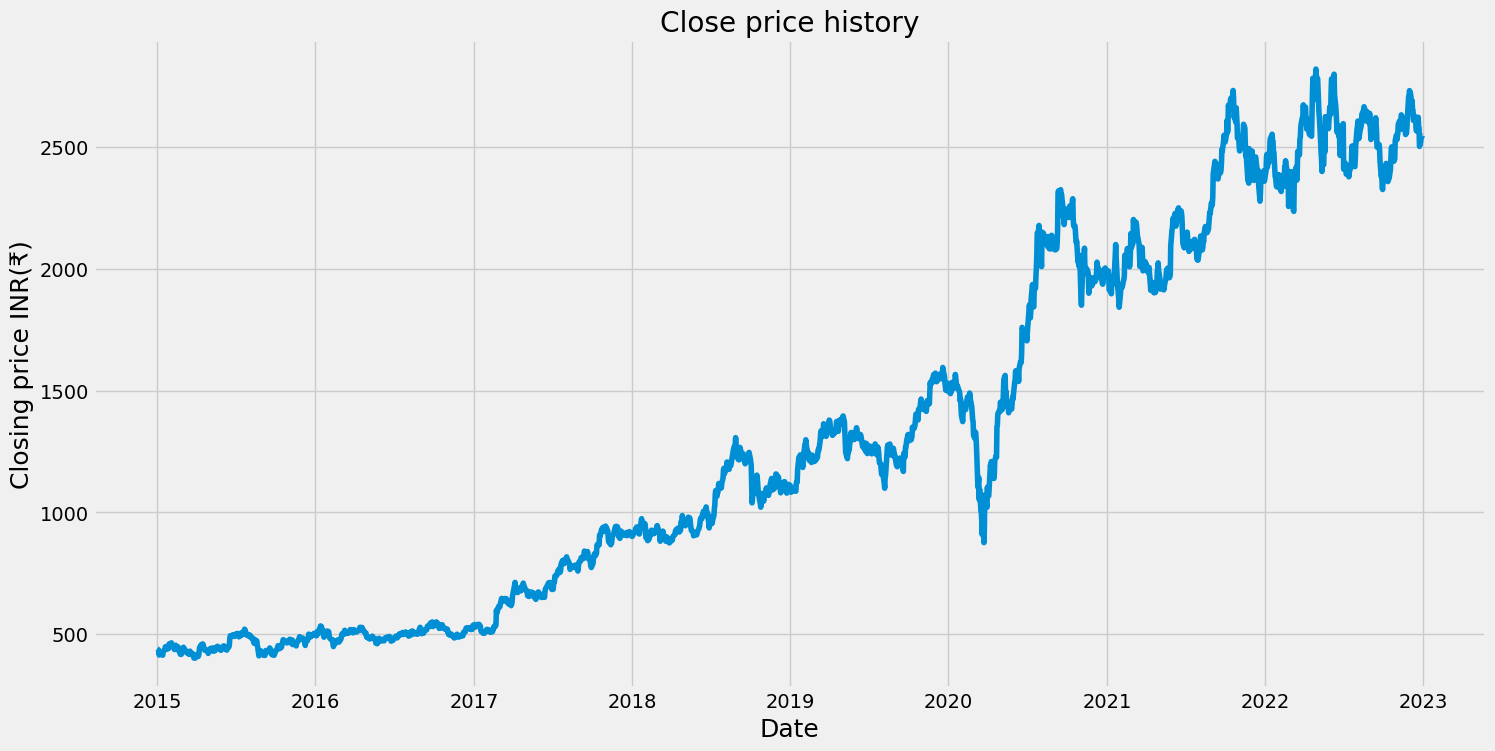

In [20]:
# plotting the graph
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price INR(₹)',fontsize=18)
plt.show()

In [21]:
# create a data frame with only the close column
data=df.filter(['Close'])
# convert data frame to a numpy array
dataset=data.values
# 80% of data given to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1581

In [22]:
# scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01580162],
       [0.0153203 ],
       [0.01333358],
       ...,
       [0.88611742],
       [0.88564191],
       [0.88725459]])

In [23]:
# create training data set
# create scaled training data set
train_data=scaled_data[0:training_data_len,:]
# split into x train and y train
x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01580162, 0.0153203 , 0.01333358, 0.0051921 , 0.00891977,
       0.00641076, 0.01014868, 0.0081005 , 0.00663607, 0.00495656,
       0.0109577 , 0.01207395, 0.01411188, 0.0189046 , 0.01966241,
       0.01495163, 0.01559681, 0.01603716, 0.0196829 , 0.02430152,
       0.02140337, 0.01992869, 0.02598103, 0.02417863, 0.02313407,
       0.02030759, 0.01760401, 0.0145932 , 0.01842328, 0.02015398,
       0.02186421, 0.01885339, 0.01861786, 0.01869978, 0.01277033,
       0.00833605, 0.00628787, 0.00663607, 0.00640052, 0.0091758 ,
       0.0109577 , 0.01844376, 0.01579139, 0.01519741, 0.01206372,
       0.00991313, 0.00925773, 0.01086553, 0.00805954, 0.00642101,
       0.00944206, 0.0118589 , 0.00929869, 0.00887881, 0.00639028,
       0.00761918, 0.00699449, 0.00379935, 0.00019457, 0.        ])]
[0.0031234600229044507]

[array([0.01580162, 0.0153203 , 0.01333358, 0.0051921 , 0.00891977,
       0.00641076, 0.01014868, 0.0081005 , 0.00663607, 0.00495656,
       0.0109577 , 0.01207395, 0.

In [24]:
# convert x_train and y_train to numpy arrays so that they can be used to train lstm model
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
# Reshape the data cause currently our data is in 2d but LSTM requires 3d
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#row,time,features
x_train.shape

(1521, 60, 1)

In [26]:
# building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25)) 
model.add(Dense(1))

In [27]:
# compling model
model.compile(optimizer='adam',loss='mean_squared_error')
# loss function checks how well the model performs on test data
# optimizer is used to improve the loss function

In [28]:
# train model/
# batch size=total no of training examples present in a batch
# epoch is the number of iterations when a dataset is passed forward and backward in a neural network
model.fit(x_train,y_train,batch_size=1,epochs=1)

1521/1521 [==============================] - 28s 17ms/step - loss: 0.0013


In [29]:
#create testing dataset
# create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
# create datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:] #values to be tested upon
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0]) #past 60 values

In [30]:
# convert data to numpy array
x_test=np.array(x_test)

In [31]:
# reshape data(2d to 3d)
x_test=np.reshape(x_test,(x_test.shape[0],x_train.shape[1],1))#row,column,features

In [32]:
# get model's predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#we want predictions to be same as y_test and we are predicting on the basis of x_test

13/13 [==============================] - 1s 11ms/step


In [33]:
# evaluate model using root mean squared error[RMSE]
# lower the RMSE,better the fit
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

15.338165978540347

C:\Users\hp\AppData\Local\Temp\ipykernel_17636\4174997535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


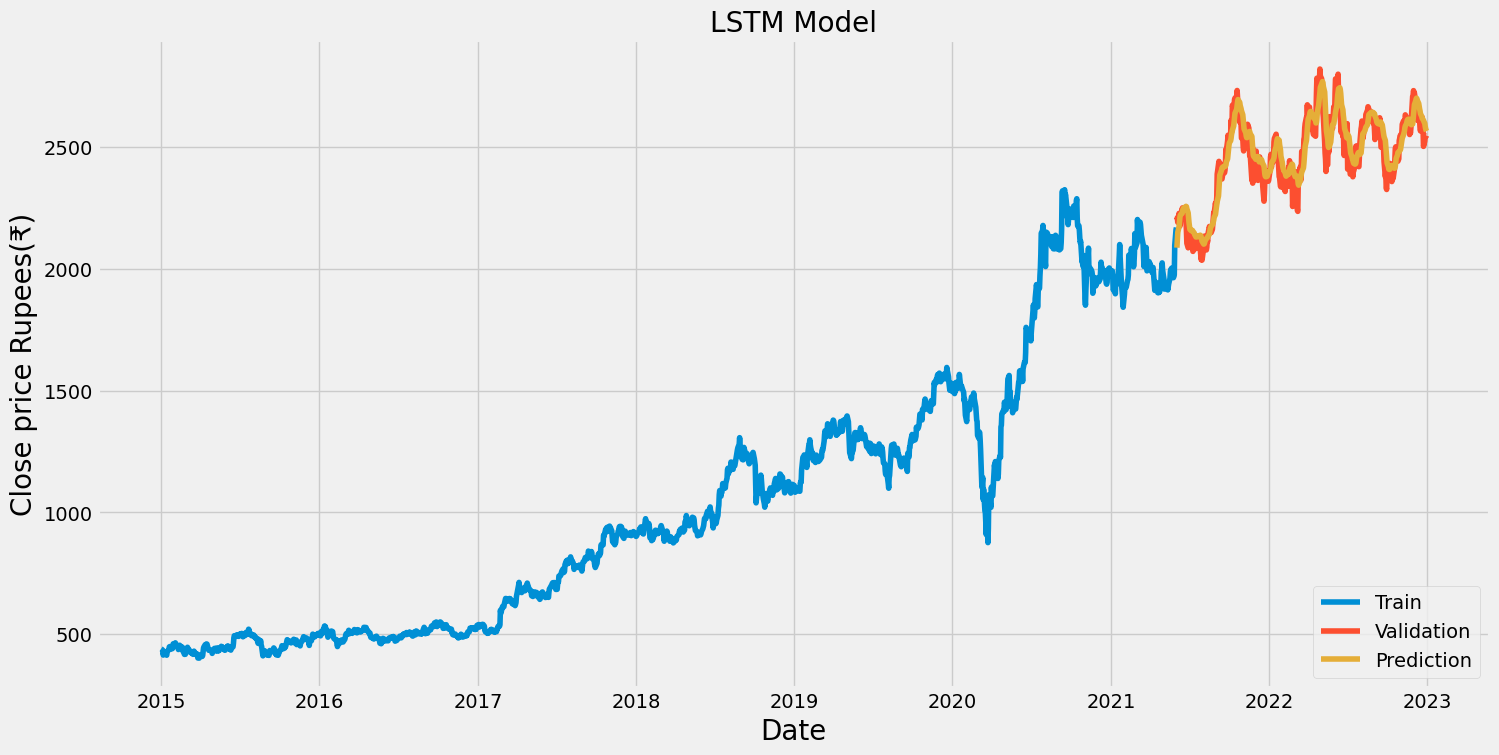

In [35]:
# plotting data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# visualizing data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close price Rupees(₹)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Prediction'],loc='lower right')
plt.show()

In [36]:
# show the actual price and the predicted price
valid

,Close,Predictions
Date,,
2021-06-02,2201.250000,2086.472656
2021-06-03,2209.649902,2118.691162
2021-06-04,2190.500000,2149.175049
2021-06-07,2227.399902,2172.945068
2021-06-08,2214.600098,2194.935547
...,...,...
2022-12-26,2524.050049,2595.963379
2022-12-27,2544.699951,2583.534912
2022-12-28,2544.449951,2574.892822


In [37]:
# get quote
reliance_quote = pdr.get_data_yahoo('RELIANCE.NS', start='2015-01-01',end='2022-12-31')
# creating a new dataframe
new_df=reliance_quote.filter(['Close'])
# getting last 60 days values and converting to array
last_60_days=new_df[-60:].values
# scaling the value
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
# appending the last 60 days scaled value
X_test.append(last_60_days_scaled)
# converting to numpy array
X_test=np.array(X_test)
# 2d to 3d
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# scaled predicted
pred_price=model.predict(X_test)
# unscaled predicted
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
[[2562.9695]]


In [38]:
reliance_quote2 = pdr.get_data_yahoo('RELIANCE.NS', start='2022-12-19',end='2022-12-20')
print(reliance_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-12-19    2599.300049
Name: Close, dtype: float64
